##Tarea 2 CASO CONVECTIVO

In [74]:
%matplotlib inline
%load_ext rmagic
print __doc__
import numpy as np
import pyart
import matplotlib.pyplot as plt
import netCDF4
import copy
import scipy.ndimage as nd
import numpy.ma as ma
from IPython.display import Latex


The rmagic extension is already loaded. To reload it, use:
  %reload_ext rmagic
Automatically created module for IPython interactive environment


###cargamos el archivo y lo leemos con pyart
####caso 18 de Noviembre 2009

In [2]:
file='/home/sofia/radar_parana/DATOS/CFRad/20091118/cfrad.20091118_062002.000_to_20091118_062342.998_INTA_Par_v1_SUR.nc'
RadParConv=pyart.io.read_cfradial(file)


In [25]:
#Miramos las variables que tenemos en el elemento
RadParConv.fields.keys()
#RadParConv.fields['uPhiDP']['data'].min()


[u'uPhiDP', u'dBZ', u'KDP', u'RhoHV', u'ZDR']

###Graficamos los datos de la Primera elevación


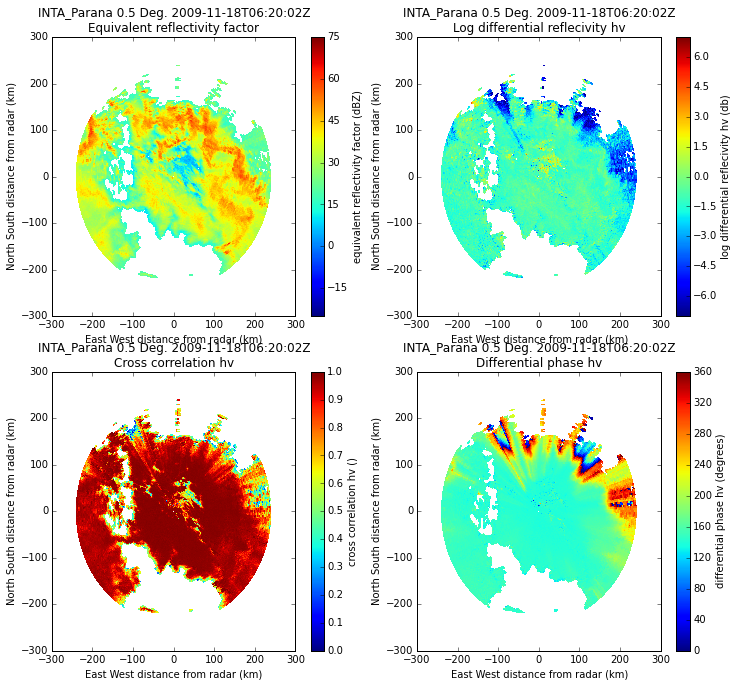

In [13]:
display = pyart.graph.RadarMapDisplay(RadParConv)

f = plt.figure(figsize = [12,11])

plt.subplot(2, 2, 1) 
display.plot_ppi('dBZ',vmin=-25,vmax=75)
plt.subplot(2, 2, 2) 
display.plot_ppi('ZDR',vmin=-7,vmax=7)
plt.subplot(2, 2, 3) 
display.plot_ppi('RhoHV',vmin=0,vmax=1)
plt.subplot(2, 2, 4) 
display.plot_ppi('uPhiDP',vmin=0,vmax=360)



###Graficamos ahora la Segunda elevación 

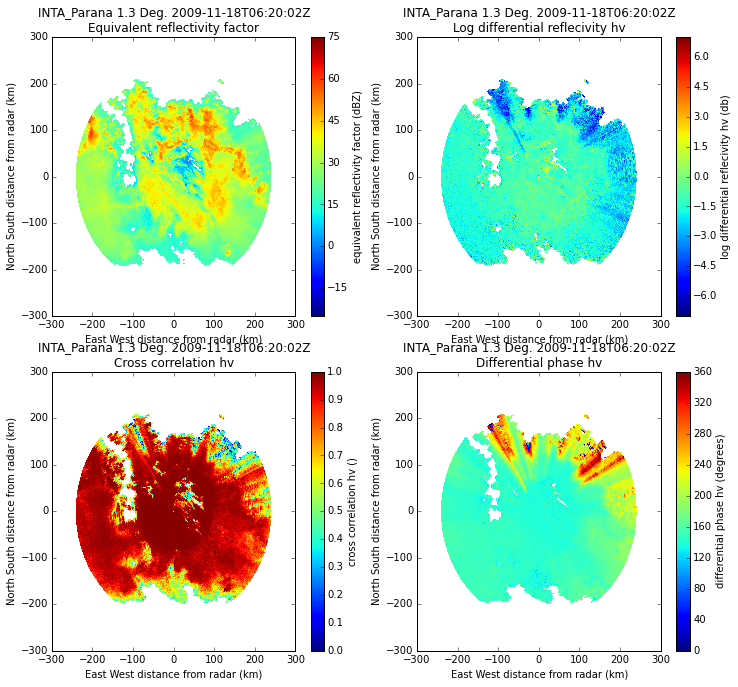

In [14]:
display = pyart.graph.RadarMapDisplay(RadParConv)
f = plt.figure(figsize = [12,11])

plt.subplot(2, 2, 1) 
display.plot_ppi('dBZ',vmin=-25,vmax=75,sweep=1)
plt.subplot(2, 2, 2) 
display.plot_ppi('ZDR',vmin=-7,vmax=7,sweep=1)
plt.subplot(2, 2, 3) 
display.plot_ppi('RhoHV',vmin=0,vmax=1,sweep=1)
plt.subplot(2, 2, 4) 
display.plot_ppi('uPhiDP',vmin=0,vmax=360,sweep=1)




###Hacemos zoom en la zona de celdas convectivas 

(0, 200)

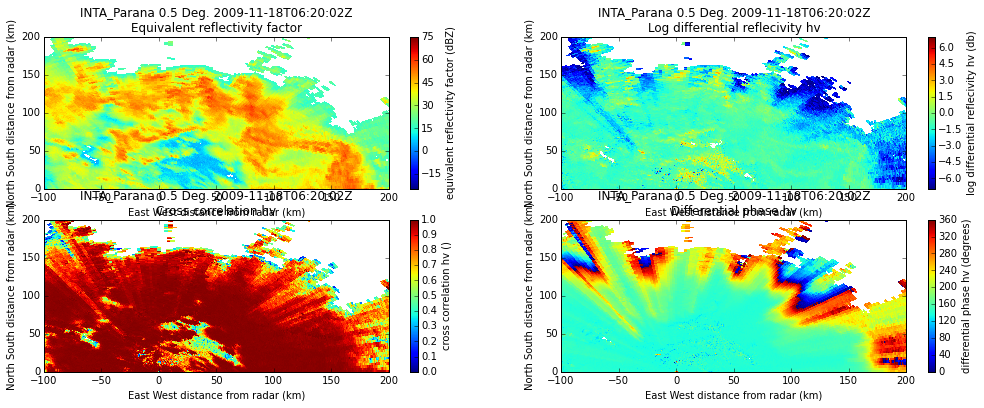

In [49]:
#de la primera elevación

display = pyart.graph.RadarMapDisplay(RadParConv)

f = plt.figure(figsize = [17,6])
minlon=RadParConv.longitude['data']-1.
maxlon=RadParConv.longitude['data']+1.
minlat=RadParConv.latitude['data']-1.
maxlat=RadParConv.latitude['data']+1.

plt.subplot(2, 2, 1) 
display.plot_ppi('dBZ',vmin=-25,vmax=75)
plt.xlim(-100,200)
plt.ylim(0,200)
plt.subplot(2, 2, 2) 
display.plot_ppi('ZDR',vmin=-7,vmax=7)
plt.xlim(-100,200)
plt.ylim(0,200)
plt.subplot(2, 2, 3) 
display.plot_ppi('RhoHV',vmin=0,vmax=1)
plt.xlim(-100,200)
plt.ylim(0,200)
plt.subplot(2, 2, 4) 
display.plot_ppi('uPhiDP',vmin=0,vmax=360) 
plt.xlim(-100,200)
plt.ylim(0,200)

###Analicemos un poco el comportamiento de las variables

In [116]:
#Armamos dos archivos con los datos de las dos primeras elevaciones
RadParConv1=RadParConv.extract_sweeps([0])
RadParConv2=RadParConv.extract_sweeps([1])
#Miramos la variable dBZ
dBZ1=RadParConv1.fields['dBZ']['data']
dBZ2=RadParConv2.fields['dBZ']['data']
#Miramos la variable ZDR, Reflectividad diferencial
ZDR1=RadParConv1.fields['ZDR']['data']
ZDR2=RadParConv2.fields['ZDR']['data']
#Miramos la variable RhoHV, coeficiente de correlacion
RhoHV1=RadParConv1.fields['RhoHV']['data']
RhoHV2=RadParConv2.fields['RhoHV']['data']
#Miramos la variable PhiDP, diferencia de fase
PhiDP1=RadParConv1.fields['uPhiDP']['data']
PhiDP2=RadParConv2.fields['uPhiDP']['data']

#Desenmascaramos los datos
dBZ1.filled()
dBZ2.filled()
ZDR1.filled()
ZDR2.filled()
RhoHV1.filled()
RhoHV2.filled()
PhiDP1.filled()
PhiDP2.filled()
0


0

In [134]:
from pandas import DataFrame
from sympy import latex
z = [[dBZ1.min(),dBZ1.max(),dBZ1.mean(),dBZ1.std()],[dBZ2.min(),dBZ2.max(),dBZ2.mean(),dBZ2.std()]]
zd = [[ZDR1.min(),ZDR1.max(),ZDR1.mean(),ZDR1.std()],[ZDR2.min(),ZDR2.max(),ZDR2.mean(),ZDR2.std()]]
ro = [[RhoHV1.min(),RhoHV1.max(),RhoHV1.mean(),RhoHV1.std()],[RhoHV2.min(),RhoHV2.max(),RhoHV2.mean(),RhoHV2.std()]]
fi = [[PhiDP1.min(),PhiDP1.max(),PhiDP1.mean(),PhiDP1.std()],[PhiDP2.min(),PhiDP2.max(),PhiDP2.mean(),PhiDP2.std()]]
tz=np.reshape(map(lambda tc: '$'+latex(tc)+'$',np.ravel(z)),np.shape(z))
tzd=np.reshape(map(lambda tc: '$'+latex(tc)+'$',np.ravel(zd)),np.shape(zd))
tro=np.reshape(map(lambda tc: '$'+latex(tc)+'$',np.ravel(ro)),np.shape(ro))
tfi=np.reshape(map(lambda tc: '$'+latex(tc)+'$',np.ravel(fi)),np.shape(fi))

Z = DataFrame(tz, index=['1 Elevacion', '2 Elevacion'],columns=['Minimo','Maximo','Media','Desvio estadar']
)
ZD = DataFrame(tzd, index=['1 Elevacion', '2 Elevacion'],columns=['Minimo','Maximo','Media','Desvio estadar']
)
RO = DataFrame(tro, index=['1 Elevacion', '2 Elevacion'],columns=['Minimo','Maximo','Media','Desvio estadar']
)
FI = DataFrame(tfi, index=['1 Elevacion', '2 Elevacion'],columns=['Minimo','Maximo','Media','Desvio estadar']
)
Z



,Minimo,Maximo,Media,Desvio estadar
1 Elevacion,$2.5$,$63.5$,$32.1148271296$,$10.632317506$
2 Elevacion,$-0.5$,$63.0$,$30.3944622575$,$9.76941053809$


,Minimo,Maximo,Media,Desvio estadar
1 Elevacion,$-8.0$,$10.6614170074$,$-1.01896541163$,$1.05131953467$
2 Elevacion,$-8.0$,$5.14960622787$,$-1.1600208506$,$0.897520784218$
